In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from PIL import Image
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Gradient Boosting 의 정의

* Gradient Boosting은 약한 학습자(일반적으로 의사 결정 트리)의 앙상블을 순차적으로 구축하여 정확성을 향상시키는 기계 학습 알고리즘입니다. Gradient Boosting의 기본 원칙은 여러 약한 모델을 하나의 강력한 모델로 결합하는 것입니다.


* 이 알고리즘은 새 모델을 손실 함수의 음의 기울기에 반복적으로 맞추는 방식으로 작동합니다. 여기서 손실 함수는 예측 값과 실제 값 간의 차이를 측정합니다. 각 반복에서 모델은 잔차 또는 이전 모델의 현재 예측과 실제 값 간의 차이를 예측하도록 학습됩니다. 그런 다음 잔차가 현재 예측에 추가되어 업데이트되어 다음 모델에 대한 새 예측이 생성됩니다.


* 주요 아이디어는 이전 모델의 잔차에 다음 모델을 피팅하여 이전 모델이 잘 예측할 수 없었던 인스턴스에 집중하는 것입니다. 이러한 모델을 추가하면 예측 오류가 줄어들어 모델의 정확도가 향상됩니다. 최종 예측은 각 모델의 성능에 따라 가중치가 결정되는 모든 모델의 예측에 대한 가중 합입니다.


* Gradient Boosting의 주요 장점은 비선형 관계가 있는 복잡한 데이터 세트를 처리할 수 있고 분류 및 회귀 문제 모두에 사용할 수 있다는 것입니다. 그러나 알고리즘은 계산 비용이 많이 들 수 있으며 최적의 성능을 달성하기 위해 하이퍼파라미터를 신중하게 조정해야 할 수 있습니다.

In [2]:
warnings.filterwarnings(action = 'ignore')
plt.rc('font', family = 'malgun gothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
X = np.linspace(5,10,100).reshape(-1,1)

Y = np.sin(X).reshape(-1,1)

Text(0.5, 1.0, '예제 데이터')

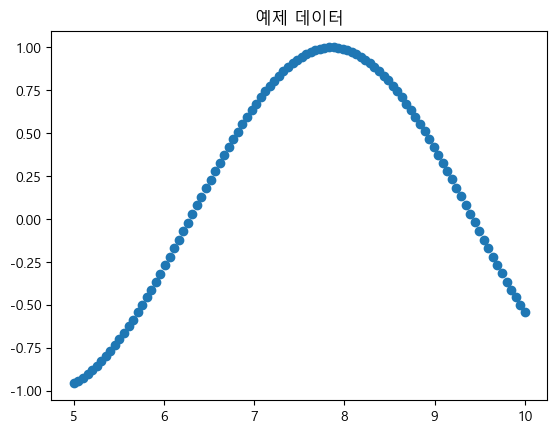

In [4]:
plt.scatter(X,Y)
plt.title('예제 데이터')

# GBM Regressor 구현하기 

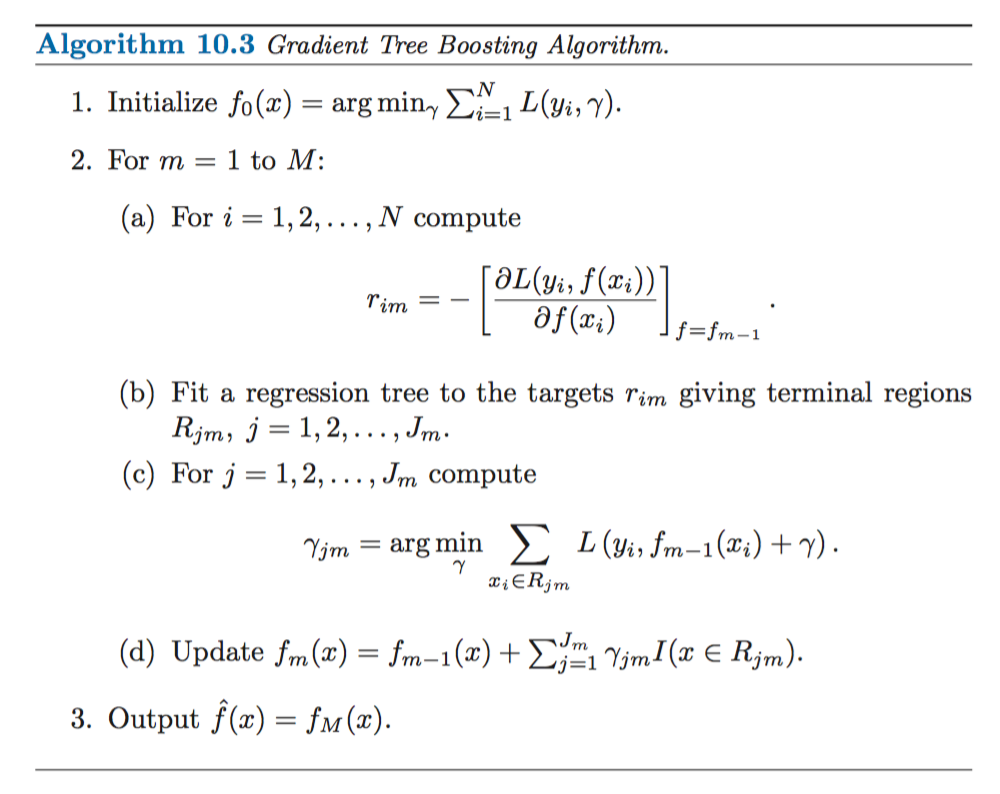

In [5]:
Image.open("C:/Users/whileduck/Desktop/gbt-alg.png")

# Initialize $F0(x)$ = $arg min_r$ $\sum L(Yi,r)$
* $L = 1/2 (Yi - F_n(Xi))^2$


* $F0$ 을 셋팅하는데 F0 은 실젯값 Yi 와 Loss funtion 을 최소한으로 만들게 해주는 값이다. 그 $Yi$ 와 $Loss function$을 최소화 시켜주는 $r$ 값은 $Yi$ 의 평균값이다.

### 1부터 $M$ 까지 Stump들은 다음 과정을 반복한다.

* $- LossFuction$ 의 미분값을 계산해 $r_im$ 을 계산한다. 
* $i$ 는 데이터의 인덱스, $m$은 m 번째의 index
* $r_im$ 을 가지고 Stump Tree 를 훈련하고 예측해 $R_jm$ 의 값을 예측한다. (잔차의 값을 훈련하고 잔차의 값을 예측한다.)
* $R_j$는 Stump 의 j 번째 leaf, m 번째 Stump 라면 1번째 leaf 는 $R_1m$ , 2 번째 leaf 는 $R_2m$ 
* 각 leaf 별로 $\Gamma_jm$ 을 계산한다.
* 각 n번째 Stump 의 leaf 의 $\Gamma$는 $F_n-1(Xi)$ 값과의 $Loss Function$ 을 최소화 시켜주는 값인데, 이는 $R_jm$ 값의 평균 (n-1 번째 예측값과 실젯값의 잔차의 평균을 의미)
* $F_n(Xi)$ = $F_n-1(X)$ + $\alpha $ * $\sum \gamma_jm I$ 로 업데이트한다.[$\alpha$ 는 learning rate] (n번째 예측값은 n-1 번째 예측값 + $\gamma_jm$)
* 이 말은 예측값에다가 각각 잔차의 값으로 도출된 leaf 값의 평균 * $\alpha$ 값을 더해가며 예측값을 업데이트 해나가겠다는 것이다.


# Output $F(X) = F_M(X)$

* 다시 말 하자면 $F(Xi) = F_0(Xi) + \gamma_i1 + \gamma_i2 ... \gamma_im $ 로 실젯값의 평균 + 업데이트 해나간 잔차 값들로 실젯값을 예측해나간다.

In [27]:
def gradient_boost(X,Y,n_estimator,eta):
    
    predicted = np.array([np.mean(Y)] * len(Y)).reshape(-1,1) # Set F0 value 
    residual = np.array(Y - predicted) # Set firest_residual

    predict_list = [predicted]
    residual_list = [residual]
    residual_sum_list= []
    mse_list = []

    for n in range(n_estimator):
        
        model = DecisionTreeRegressor(max_depth = 1, min_samples_leaf = 10) # Stump Tree 만들기

        model.fit(X,residual)
        
        residual = model.predict(X).reshape(-1,1)
        
        predicted = predicted + eta*residual
        

        
        
        residual = np.array(Y - predicted) # residual updat
        
        residual_list.append(residual)
        predict_list.append(predicted)
                
        mse = round(mean_squared_error(Y,predicted),4)
        residual_sum_list.append(np.sum(np.abs(residual)))
        
    return predict_list,residual_list,residual_sum_list,mse_list
    

In [60]:
X = np.linspace(5,10,100).reshape(-1,1)
Y = np.sin(X).reshape(-1,1)

predict_list,residual_list,residual_sum_list, mse_list = gradient_boost(X,Y,1000,0.05)

### Estimator 반복 횟수 별 예측값과 잔차값들의 변화

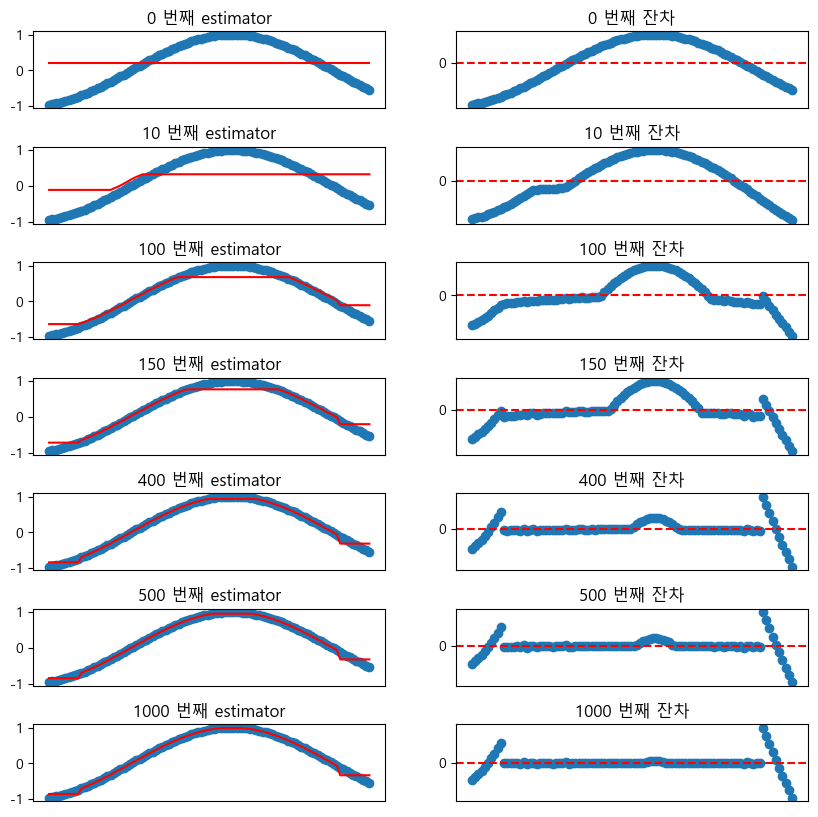

In [61]:
i = 1
j = 2

plt.figure(figsize = [10,10])
plt.subplots_adjust(hspace = 0.5)

for num in [0,10,100,150,400,500,1000]:
    
    plt.subplot(7,2,i)
    plt.scatter(X,Y)
    plt.plot(X,predict_list[num], c = 'r')
    plt.xticks([],[])
    
    plt.title(f'{num} 번째 estimator')
    
    
    plt.subplot(7,2,j)
    plt.scatter(X,residual_list[num])
    plt.axhline(0, ls = '--', c = 'r')
    plt.xticks([],[])
    plt.yticks([0],[0])
    plt.title(f'{num} 번째 잔차')
    
    
    i += 2
    j += 2


* 잔차값과 예측값을 업데이트 해나가면서 잔차값들이 점점 0에 수렴해나가는 모습을 볼 수 있다.

Text(0, 0.5, '잔차 절댓값 합')

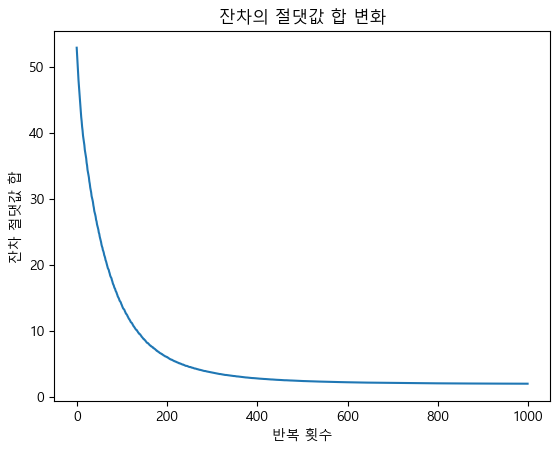

In [62]:
plt.plot(residual_sum_list)
plt.title('잔차의 절댓값 합 변화')
plt.xlabel('반복 횟수')
plt.ylabel('잔차 절댓값 합')

* 각 Estimator 가 예측하게 되는 잔차값의 변화를 보자 
* Estimator가 증가 할 수록 예측값은 계속 잔차값만큼을 더하거나 빼주며 업데이트 해주기 때문에 예측하는 잔차값은 계속하여 감소하게 될 수 밖에 없다.
* 밑에 사진을 보게 되면 왼쪽 leaf 는 0.006 이후부터는 잔차값이 업데이트 되지 않고 있다. (아마 매우 소량의 값만 계속 업데이트 되어 가고 있었을 것이다.)

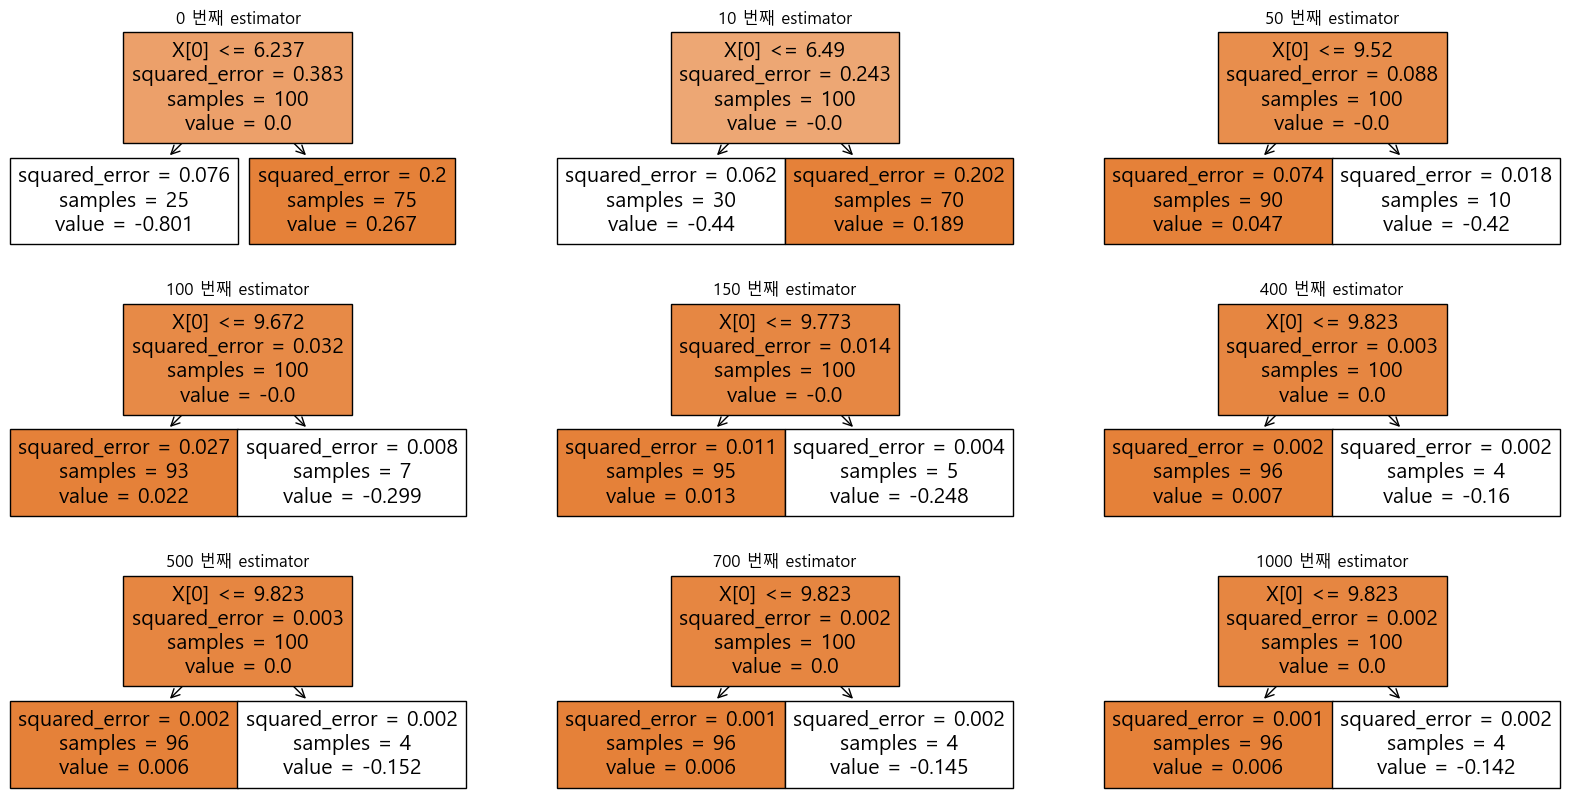

In [75]:
plt.figure(figsize = [20,10])


i = 1

for num in [0,10,50,100,150,400,500,700,1000]:
    
    model = DecisionTreeRegressor(max_depth = 1)
    
    model.fit(X,residual_list[num])
    
    plt.subplot(3,3,i)
    plot_tree(model,filled = True)
    plt.title(f'{num} 번째 estimator')
    
    i += 1